In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras import datasets, layers, models
from sklearn.metrics import accuracy_score
from tensorflow.keras import datasets, layers,models
from tensorflow.keras.models import Model, load_model
from sklearn.neural_network import MLPRegressor
from sklearn import metrics
import plotly.graph_objects as go
from datetime import datetime
import yfinance as yf
tf.random.set_seed(7)

In [ ]:
ticker = "GANESHHOUC.NS"
ganho = yf.download(ticker, start="2012-01-01", end="2021-07-5")
ganho = ganho.reset_index()
ticker = "MSFT"
microsoft = yf.download(ticker, start="2012-01-01", end="2021-07-25")
microsoft = microsoft.reset_index()
ticker = "AAPL"
apple = yf.download(ticker,start="2012-01-01", end="2021-07-25")
apple = apple.reset_index()
# apple['Date']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Text(0, 0.5, 'Closing Price')

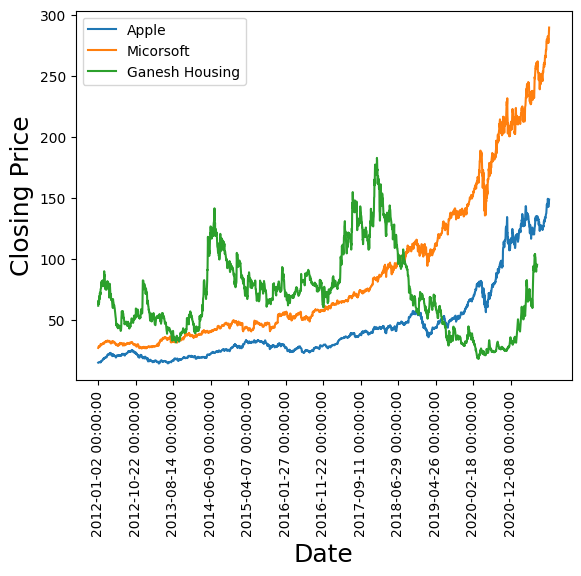

In [ ]:
# plt.plot(range(Facebook.shape[0]),(Facebook['Close']))
# plt.plot(range(Amazon.shape[0]),(Amazon['Close']))
plt.plot(range(apple.shape[0]),(apple['Close']))
plt.plot(range(microsoft.shape[0]),(microsoft['Close']))
plt.plot(range(ganho.shape[0]),(ganho['Close']))

plt.xticks(range(0,ganho.shape[0],200),ganho['Date'].loc[::200],rotation=90)

plt.legend(["Apple","Micorsoft","Ganesh Housing"])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Closing Price',fontsize=18)

In [ ]:
class stock_predict_DL:
  def Mlp_model(self):
        print("Multilayer perceptron (MLP)")
        regr = MLPRegressor(hidden_layer_sizes = 100, alpha = 0.01,solver = 'lbfgs',shuffle=True)
        regr.fit(self.X_train, self.y_train)
        y_pred = regr.predict(self.X_test)
        y_pred = y_pred.reshape(len(y_pred),1)
        y_pred = self.scaler.inverse_transform(y_pred)
        print("R2 SCORE")
        print(metrics.r2_score(self.y_test, y_pred))
        self.model_score.append(["MLP",metrics.r2_score(self.y_test, y_pred)])
        print("MSLE")
        print(metrics.mean_squared_log_error(self.y_test, y_pred))
        plt.plot(y_pred)
        plt.plot(self.y_test)
        plt.legend(["Predicted","Observed"])
        plt.xticks(range(0,len(self.y_test),20),self.testd[::20],rotation=90)
        plt.xlabel('Date',fontsize=18)
        plt.ylabel('Price',fontsize=18)
        plt.title("MLP")

  def __init__(self,comp_df):
        data = comp_df.filter(['Open'])
        dataset = data.values

        # We take 90% of the data for training and 10% for testing
        training_data_len = int(np.ceil( len(dataset) * 0.90 ))


        # scaling the open prices
        self.scaler = MinMaxScaler(feature_range=(0,1))
        scaled_data = self.scaler.fit_transform(dataset)

        train_data = scaled_data[0:int(training_data_len), :]

        # we'll split the dataset for test and train and store in x_train and y_train
        self.X_train = []
        self.y_train = []

        # We are taking predicting the open price of a given day based on the trend in the previous 60 days
        for i in range(60, len(train_data)):
            self.X_train.append(train_data[i-60:i, 0])
            self.y_train.append(train_data[i, 0])


        self.X_train, self.y_train = np.array(self.X_train), np.array(self.y_train)


        test_data = scaled_data[training_data_len - 60: , :]

        # Create the data sets for self.X_test and self.y_test
        self.X_test = []

        # Remaining 10% of the data needs to be given for testing
        self.y_test = dataset[training_data_len:, :]
        for i in range(60, len(test_data)):
            self.X_test.append(test_data[i-60:i, 0])

        self.X_test = np.array(self.X_test)
        test_dates = comp_df['Date'].values
        self.testd = test_dates[training_data_len:]
        # self.testd_num = [datetime.strptime(date, '%Y-%m-%d').dayofyear for date in self.testd]

        # List to store the R2 scores of all the models to get the best model at the end
        self.model_score = []



Multilayer perceptron (MLP)
R2 SCORE
0.9799988748302374
MSLE
0.0034168547358492873


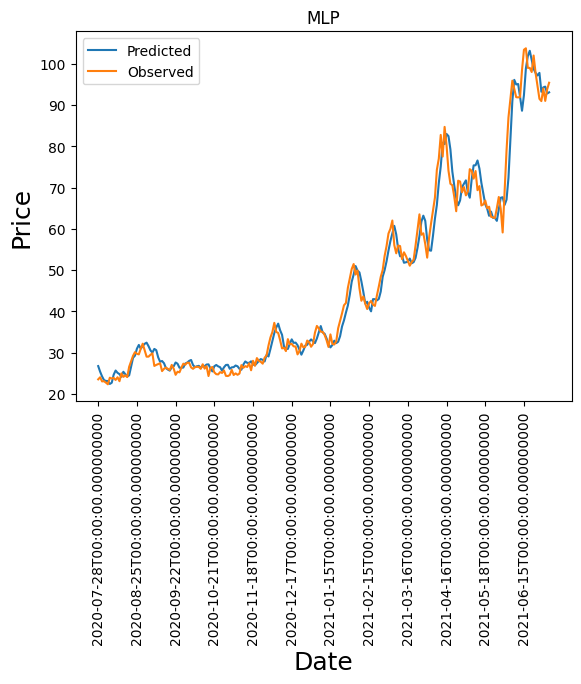

In [ ]:
company_stock = stock_predict_DL(ganho)
company_stock.Mlp_model()

SyntaxError: incomplete input (<ipython-input-6-0938bd8906ef>, line 1)